## Helper Functions

**csv_to_dict(**file_name**)**: takes a csv file as argument, returns a list

**dict_sort(**items**)**: takes a list and returns dictionary of count and author

**total_files(**list**)**: takes a list and returns the total files in a project

**sort_from_list(**items**)** : takes a list returned from csv_to_dict and returns a dictionary to be inputted to BF alg

**busFactorCalcmin(**num_file, data, metric, project_name = "Undefined"**)**:
num_file -> called from total_files
data-> called from sort_from_list
metric ->string of metric using - for output to keep track of what is being computed
project_name -> string of project name for output

In [ ]:
def csv_to_dict(file_name):
    auth_list = []
    with open(file_name, "r") as file:
        for line in file:
            auth_list.append(line.split(','))
    return(auth_list)


In [ ]:
def dict_sort(items):
    ret ={}
    for i in items:
        if i not in ret:
            ret[i] = 1
        else:
            ret[i] += 1        
    return ret


In [ ]:
def total_files(items):
    
    return len(items) - 1

In [ ]:
def sort_from_list(items):
    items = items[1::]
    ret = {}
    for i in items:
        if i[1] not in ret:
            ret[i[1]] = 1
        else:
            ret[i[1]] += 1   
    return ret

In [ ]:
# num = total_files(csv_file)
# sort = sort_from_list(csv_file) # data already sorted
# curr_metric = 'commit'

def busFactorCalcmin(num_file, data, metric, project_name = "Undefined"):
    print(f"NUM FILES: {num_file}")
    if num_file == 0:
        return ["NO FILES"]
    busfactor = 0
    count = 0
    # puts all of the numerical data in own list
    data_list = []
    for i in data:
        data_list.append(data[i])
    
    # initialize AVL tree
    t = AVLTree()
    root = None
    for i in data:
        root = t.insert_node(None, data[i])
  
    # compute BF
    runtime = 0
    print("MAX developer: ", max(data_list))
    while count < (num_file / 2):
        minNode = min(data_list)
        #print("count: ", count)
        count += minNode
        #print("MIN: ", minNode)
        t.delete_node(root, minNode)
        data_list.remove(minNode)
        #print(data_list)
        
        busfactor += 1
        runtime += 1
        
    print("BusFactor: ", busfactor)
    return [busfactor, metric, project_name]

#print(busFactorCalcmin(num, sort, curr_metric, "spack"))

In [ ]:
## Base class for AVL tree

class TreeNode(object):
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1


In [ ]:


## code adopted from https://www.programiz.com/dsa/avl-tree

class AVLTree(object):
    # Function to insert a node

    def insert_node(self, root, key):
        # Find the correct location and insert the node
        if not root:
            return TreeNode(key)
        elif key < root.key:
            root.left = self.insert_node(root.left, key)
        else:
            root.right = self.insert_node(root.right, key)

        root.height = 1 + max(self.getHeight(root.left),
                              self.getHeight(root.right))
        
        # Update the balance factor and balance the tree
        balanceFactor = self.getBalance(root)
        if balanceFactor > 1:
            if key < root.left.key:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)

        if balanceFactor < -1:
            if key > root.right.key:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)

        return root

    # Function to delete a node

    def delete_node(self, root, key):
        # Find the node to be deleted and remove it
        if not root:
            return root
        elif key < root.key:
            root.left = self.delete_node(root.left, key)
        elif key > root.key:
            root.right = self.delete_node(root.right, key)
        else:
            if root.left is None:
                temp = root.right
                root = None
                return temp
            elif root.right is None:
                temp = root.left
                root = None
                return temp
            temp = self.getMinValueNode(root.right)
            root.key = temp.key
            root.right = self.delete_node(root.right,
                                          temp.key)
        if root is None:
            return root

        # Update the balance factor of nodes
        root.height = 1 + max(self.getHeight(root.left),
                              self.getHeight(root.right))
        balanceFactor = self.getBalance(root)

        # Balance the tree
        if balanceFactor > 1:
            if self.getBalance(root.left) >= 0:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)
        if balanceFactor < -1:
            if self.getBalance(root.right) <= 0:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)
        return root

    # Function to perform left rotation
    def leftRotate(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
        return y

    # Function to perform right rotation
    def rightRotate(self, z):
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
        return y

    # Get the height of the node
    def getHeight(self, root):
        if not root:
            return 0
        return root.height

    # Get balance factore of the node
    def getBalance(self, root):
        if not root:
            return 0
        return self.getHeight(root.left) - self.getHeight(root.right)

    def getMinValueNode(self, root):
        if root is None or root.left is None:
            return root
        return self.getMinValueNode(root.left)

    def preOrder(self, root):
        if not root:
            return
        print("{0} ".format(root.key), end="")
        self.preOrder(root.left)
        self.preOrder(root.right)

    # Print the tree
    def printTree(self, currPtr, indent, last):
        if currPtr != None:
            print(indent)
            if last:
                print("R----")
                indent += "     "
            else:
                print("L----")
                indent += "|    "
            print(currPtr.key)
            self.printTree(currPtr.left, indent, False)
            self.printTree(currPtr.right, indent, True)



## Bus Factor Assessment using AVL Algorithm

In [ ]:
#@title
import os, sys
if not os.path.exists('ideas-uo'): 
  !git clone https://github.com/HPCL/ideas-uo
os.chdir('ideas-uo')
!git pull --no-edit && pip install -r requirements.txt
notebook_dir = "/content/ideas-uo/notebooks"
sys.path.append('/content/ideas-uo/src')
os.chdir(notebook_dir)

Cloning into 'ideas-uo'...
remote: Enumerating objects: 4618, done.
remote: Counting objects: 100% (4618/4618), done.
remote: Compressing objects: 100% (1843/1843), done.
remote: Total 4618 (delta 2609), reused 4575 (delta 2589), pack-reused 0
Receiving objects: 100% (4618/4618), 126.74 MiB | 16.84 MiB/s, done.
Resolving deltas: 100% (2609/2609), done.
Already up to date.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 66 kB 2.9 MB/s 
     |████████████████████████████████| 88 kB 6.8 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 121 kB 70.6 MB/s 
     |████████████████████████████████| 174 kB 58.3 MB/s 
     |████████████████████████████████| 2.2 MB 40.8 MB/s 
     |████████████████████████████████| 1.6 MB 55.9 MB/s 
     |████████████████████████████████| 83 kB 2.2 MB/s 
  Created wheel for mysqlclient: filename=mysqlclient-2.1.1-cp38-cp38-

In [ ]:
import sys, os, getpass, warnings
warnings.filterwarnings('ignore')
from patterns.visualizer import Visualizer
Visualizer()

In [ ]:
project_list = ["ideas-uo", "spack", "petsc", "hypre", "lammps", "ginkgo", "nwchem"]
year_list = [2017, 2018, 2019, 2020, 2021]
# project_list = ["hypre"]
# projects are all ECP projects 

In [ ]:
vis = Visualizer(project_name= "ideas-uo")
print("HEADER")
print("getting data ...")
vis.get_data()
print("done getting data ...")
print()
print(vis.commit_data.author)
author = vis.commit_data.author

#df = vis.plot_developer_file_map()

HEADER
getting data ...
Database password:··········
INFO: Loading ideas-uo data from database. This can take a while...
INFO: Loaded ideas-uo data from the database (exclude_forks=False, forks_only=False)
INFO: Cleaning up data and computing averages...
INFO: Done computing averages. 107 file changes (code only)
done getting data ...

datetime
2021-03-02 09:19:03    Carter Perkins
2021-03-02 09:19:03    Carter Perkins
2021-02-27 18:19:39    Carter Perkins
2021-02-27 18:08:11    Carter Perkins
2021-02-27 18:03:27    Carter Perkins
                            ...      
2021-08-16 23:41:13    Carter Perkins
2021-08-16 23:40:03    Carter Perkins
2021-08-16 20:04:27    Carter Perkins
2021-08-16 20:03:31    Carter Perkins
2021-08-16 20:00:28    Carter Perkins
Name: author, Length: 107, dtype: object


In [ ]:
results2019 = []

INFO: Loaded local cached copy of ideas-uo data.
INFO: Cleaning up data and computing averages...
INFO: Done computing averages. 107 file changes (code only)
INFO: No external files found. Total size: 107 changes
INFO: Analyzing author names, this can take a few minutes...
INFO: Loaded local cached copy of ideas-uo data.
INFO: Cleaning up data and computing averages...
INFO: Done computing averages. 107 file changes (code only)

>>> Degree of authorship based on commits:
CHECK HERE

>>> Authors with DOA>0.75 per file:
Computing Bus Factor ...(data commented out above
NUM FILES: 40
MAX developer:  17
BusFactor:  4
Done computing Bus Factor for commits

NUM FILES: 40
MAX developer:  17
BusFactor:  4
NUM FILES: 40
MAX developer:  17
BusFactor:  4
length of df before sort: 50
39
NUM FILES: 39
MAX developer:  16
BusFactor:  4

NUM FILES: 39
MAX developer:  16
BusFactor:  4
length of df before sort: 50
NUM FILES: 38
MAX developer:  16
BusFactor:  4
NUM FILES: 38
MAX developer:  16
BusFactor:

INFO: Loaded local cached copy of ginkgo data.
INFO: Cleaning up data and computing averages...
INFO: Done computing averages. 103506 file changes (code only)

>>> Degree of authorship based on commits:
CHECK HERE

>>> Authors with DOA>0.75 per file:
Computing Bus Factor ...(data commented out above
NUM FILES: 1546
MAX developer:  277
BusFactor:  17
Done computing Bus Factor for commits

NUM FILES: 1546
MAX developer:  277
BusFactor:  17
NUM FILES: 1546
MAX developer:  277
BusFactor:  17
length of df before sort: 8207
1721
NUM FILES: 1721
MAX developer:  345
BusFactor:  19

NUM FILES: 1721
MAX developer:  345
BusFactor:  19
length of df before sort: 8207
NUM FILES: 1687
MAX developer:  350
BusFactor:  20
NUM FILES: 1687
MAX developer:  350
BusFactor:  20
Database password:··········
INFO: Loading nwchem data from database. This can take a while...
INFO: Loaded nwchem data from the database (exclude_forks=False, forks_only=False)
INFO: Cleaning up data and computing averages...
INFO: Do

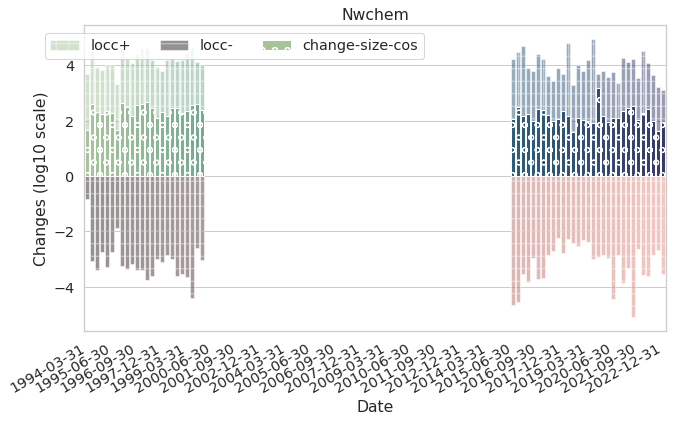

In [ ]:
import sys, os, getpass, warnings
import pandas as pd

warnings.filterwarnings("ignore")
sys.path.append(os.path.join(os.getcwd(), "..", "src"))
#from patterns.visualizer import Visualizer

for i in project_list:
    project = i
    vis = Visualizer(project_name=project)
    vis.get_data()
    removed = vis.remove_external()
    vis.hide_names = False
    
    if not ("unique_author" in vis.commit_data.columns):
        vis.set_unique_authors()

    """ vis.commit_data columns: 
    ['sha', 'branch', 'datetime', 'author', 'email', 'message', 'filepath',
        'diff', 'year', 'month', 'day', 'doy', 'dow', 'diff_summary',
        'locc-basic', 'locc', 'locc-', 'locc+', 'change-size-cos',
        'unique_author']
    """
    vis.get_data()
    # Create author df containing just filenames
    author_df = vis.commit_data[["filepath", "unique_author"]].reset_index().copy()
    author_df["commit_counts"] = 1

    # Count commits per author per file
    commits = author_df.groupby(["filepath", "unique_author"]).sum().reset_index()
    # print(commits.head())

    commits["total_commits"] = commits.groupby("filepath")["commit_counts"].transform("sum")
    commits.reset_index()
    # print(commits)

    # Compute a simple authorship metric based on commits
    commits["degree_commits"] = commits["commit_counts"] / commits["total_commits"]
    print("\n>>> Degree of authorship based on commits:")
    #print(commits.sort_values(by=["degree_commits"], ascending=False))
    print("CHECK HERE")
    print("\n>>> Authors with DOA>0.75 per file:")
    doa_commits_df = (
        commits[commits["degree_commits"] >= 0.75]
        .groupby("filepath")
        .agg({"unique_author": ",".join})
        .sort_values(by=["unique_author"], ascending=False)
    )
    doa_commits_df.reset_index()

    # print(doa_commits_df)
    # print(type(doa_commits_df))
    print("Computing Bus Factor ...(data commented out above")
    doa_commits_df.to_csv(f'doa_commits-{project}.csv')

    csv_file1 = csv_to_dict(f'doa_commits-{project}.csv')
    busFactorCalcmin(total_files(csv_file1), sort_from_list(csv_file1), "commits", project_name = f"{project}")
    print("Done computing Bus Factor for commits")
    print()

    # Next, compute a simple authorship metric based on lines of code and cos difference
    author_df = (
        vis.commit_data[["filepath", "unique_author", "locc-basic", "change-size-cos"]]
        .reset_index()
        .copy()
    )

    # Accumulate changes per author per file
    locc_counts = (
        author_df.groupby(["filepath", "unique_author"])
        .agg({"locc-basic": "sum", "change-size-cos": "sum"})
        .reset_index()
    )

    # Normalize changes per author per file (make them relative to totals per file)
    locc_counts["total_locc"] = locc_counts.groupby("filepath")["locc-basic"].transform(
        "sum"
    )
    locc_counts["degree_locc"] = locc_counts["locc-basic"] / locc_counts["total_locc"]

    locc_counts["total_cosdiff"] = locc_counts.groupby("filepath")[
        "change-size-cos"
    ].transform("sum")
    locc_counts["degree_cosdiff"] = (
        locc_counts["change-size-cos"] / locc_counts["total_cosdiff"]
    )
    #print("\n>>> Changes per file per author (normalized)\n ")
    # print("\n>>> Changes per file per author (normalized)\n", locc_counts)

    doa_df = (
        commits.merge(locc_counts, on=["filepath", "unique_author"])
        .reset_index()
        .drop(["index"], axis=1)
    )
    
    # Commits
    commit_df = doa_df[["unique_author", "degree_commits"]]
    commit_df = commit_df[commit_df.degree_commits >= .75]      
    len(commit_df)
    commit_df.columns[1]
    commit_df.to_csv(f'{project}-{commit_df.columns[1]}.csv')

    csv_commit_new = csv_to_dict(f'{project}-{commit_df.columns[1]}.csv')
    busFactorCalcmin(total_files(csv_commit_new), sort_from_list(csv_commit_new), "commits", project_name = f"{project}")
    results2019.append(busFactorCalcmin(total_files(csv_commit_new), sort_from_list(csv_commit_new), "commits", project_name = f"{project}"))

    # N = 10
    # vis.reset()
    # #vis.set_unique_authors()  # force author recomputation, this is expensive, so the result will be cached
    
    # vis.set_max_ylabel_length(30)
    # top_N = vis.plot_top_N_heatmap(N, locc_metric='commits_df')
    # top_N.head()

    # Locc
    locc_df = doa_df[["unique_author", "degree_locc"]]
    print(f"length of df before sort: {len(locc_df)}")
    locc_df = locc_df[locc_df.degree_locc >= .75]      

    print(len(locc_df))
    locc_df.columns[1]
    locc_df.to_csv(f'{project}-{locc_df.columns[1]}.csv')

    csv_locc_new = csv_to_dict(f'{project}-{locc_df.columns[1]}.csv')
    busFactorCalcmin(total_files(csv_locc_new), sort_from_list(csv_locc_new), "locc", project_name = f"{project}")
    print()
    results2019.append(busFactorCalcmin(total_files(csv_locc_new), sort_from_list(csv_locc_new), "locc", project_name = f"{project}"))

    # N = 10
    # vis.reset()
    # #vis.set_unique_authors()  # force author recomputation, this is expensive, so the result will be cached
    
    # vis.set_max_ylabel_length(30)
    # top_N = vis.plot_top_N_heatmap(N, locc_metric='locc_df')
    # top_N.head()

    # COS_df
    cos_df = doa_df[["unique_author", "degree_cosdiff"]]
    print(f"length of df before sort: {len(cos_df)}")
    cos_df = cos_df[cos_df.degree_cosdiff >= .75]      
    len(cos_df)
    cos_df.columns[1]
    cos_df.to_csv(f'{project}-{cos_df.columns[1]}.csv')

    csv_cos_new = csv_to_dict(f'{project}-{cos_df.columns[1]}.csv')
    busFactorCalcmin(total_files(csv_cos_new), sort_from_list(csv_cos_new), "cos", project_name = f"{project}")
    results2019.append(busFactorCalcmin(total_files(csv_cos_new), sort_from_list(csv_cos_new), "cos", project_name = f"{project}"))

df = vis.plot_overall_project_locc(log=True)
N = 10
# vis.reset()
# #vis.set_unique_authors()  # force author recomputation, this is expensive, so the result will be cached

# vis.set_max_ylabel_length(30)
# top_N = vis.plot_top_N_heatmap(N, locc_metric='degree_cosdiff')
# top_N.head()

In [ ]:
for i in results2019:
    print(i)

[4, 'commits', 'ideas-uo']
[4, 'locc', 'ideas-uo']
[4, 'cos', 'ideas-uo']
[126, 'commits', 'spack']
[162, 'locc', 'spack']
[314, 'cos', 'spack']
[67, 'commits', 'petsc']
[94, 'locc', 'petsc']
[95, 'cos', 'petsc']
[32, 'commits', 'hypre']
[38, 'locc', 'hypre']
[39, 'cos', 'hypre']
[72, 'commits', 'lammps']
[118, 'locc', 'lammps']
[116, 'cos', 'lammps']
[17, 'commits', 'ginkgo']
[19, 'locc', 'ginkgo']
[20, 'cos', 'ginkgo']
[48, 'commits', 'nwchem']
[64, 'locc', 'nwchem']
[59, 'cos', 'nwchem']


In [ ]:
print(results_list)
for i in results_list:
    print(i)

NameError: ignored

In [ ]:
# Commits

commit_df = doa_df[["unique_author", "degree_commits"]]
commit_df = commit_df[commit_df.degree_commits >= .75]      
#commits[commits["degree_commits"] >= 0.75]
len(commit_df)
commit_df.columns[1]
commit_df.to_csv(f'{project}-{commit_df.columns[1]}.csv')

csv_commit_new = csv_to_dict(f'{project}-{commit_df.columns[1]}.csv')
#print(csv_commit_new)
busFactorCalcmin(total_files(csv_commit_new), sort_from_list(csv_commit_new), "commits", project_name = f"{project}")
results_list.append(busFactorCalcmin(total_files(csv_commit_new), sort_from_list(csv_commit_new), "commits", project_name = f"{project}"))


In [ ]:
# Locc

locc_df = doa_df[["unique_author", "degree_locc"]]
print(f"length of df before sort: {len(locc_df)}")
locc_df = locc_df[locc_df.degree_locc >= .75]      

print(len(locc_df))
locc_df.columns[1]
locc_df.to_csv(f'{project}-{locc_df.columns[1]}.csv')

csv_locc_new = csv_to_dict(f'{project}-{locc_df.columns[1]}.csv')
#print(csv_commit_new)
busFactorCalcmin(total_files(csv_locc_new), sort_from_list(csv_locc_new), "locc", project_name = f"{project}")
print()
#results_list.append(busFactorCalcmin(total_files(csv_locc_new), sort_from_list(csv_locc_new), "locc", project_name = f"{project}"))

In [ ]:
# COS
cos_df = doa_df[["unique_author", "degree_cosdiff"]]
print(f"length of df before sort: {len(cos_df)}")
cos_df = cos_df[cos_df.degree_cosdiff >= .75]      
#commits[commits["degree_commits"] >= 0.75]
len(cos_df)
cos_df.columns[1]
cos_df.to_csv(f'{project}-{cos_df.columns[1]}.csv')

csv_cos_new = csv_to_dict(f'{project}-{cos_df.columns[1]}.csv')
#print(csv_commit_new)
busFactorCalcmin(total_files(csv_cos_new), sort_from_list(csv_cos_new), "cos", project_name = f"{project}")
#results_list.append(busFactorCalcmin(total_files(csv_cos_new), sort_from_list(csv_cos_new), "cos", project_name = f"{project}"))

In [ ]:
for i in results_list:
    print(i)

In [ ]:
def df_to_BF(data_frame, author_col = "unique_author", metric_col = "degree_commits", project = "Undeclared"):
    new_df = data_frame[[author_col, metric_col]]
    new_df = new_df[new_df.metric_col >= .75]
    new_df.to_csv(f'{project}-{new_df.columns[1]}.csv')

    csv_use = csv_to_dict(f'{project}-{commit_df.columns[1]}.csv')
    return busFactorCalcmin(total_files(csv_use), sort_from_list(csv_use), "commits", project_name = f"{project}")
df_to_BF("degree_commits", doa_df, "ideas_uo")

In [ ]:
doa_df.head()

In [ ]:
new_df = doa_df[["unique_author", "degree_commits"]]
new_df = new_df[new_df.degree_commits >= .75]      
#commits[commits["degree_commits"] >= 0.75]
len(new_df)
new_df.columns[1]

In [ ]:
doa_df.to_csv(f'{project}-{new_df.columns[1]}.csv')

In [ ]:
num = total_files(csv_file)

sort = sort_from_list(csv_file) # data already sorted
curr_metric = 'commit'

def busFactorCalcmax(num_file, data, metric, project_name = "Undefined"):
    busfactor = 0
    count = 0

    # puts all of the numerical data in own list
    data_list = []
    for i in data:
        data_list.append(data[i])
    
    # initialize AVL tree
    t = AVLTree()
    root = None
    for i in data:
        root = t.insert_node(None, data[i])
  
    # compute BF
    while count <= (num_file // 2):
        minNode = data_list[0]
        count += minNode
        #print("MIN: ", minNode)
        t.delete_node(root, minNode)
        data_list.remove(minNode)
        #print(data_list)
        busfactor += 1

    return [busfactor, metric, project_name]

print(busFactorCalcmax(num, sort, curr_metric, "spack"))

In [ ]:
num = total_files(auth_list)
sort = sort_from_list(auth_list)
curr_count = 0

t = AVLTree()
root = None
for i in sort:
    root = t.insert_node(None, sort[i])

test1 = []
for i in sort:
    test1.append(sort[i])
    


# for i in myDic:
#     print (i)          # this will print all keys
#     print (myDic[i]) 
busfactor = 0
while curr_count <= (num // 2):
    minNode = min(test1)
    curr_count += minNode
    print("MIN: ", minNode)
    t.delete_node(root, minNode)
    test1.remove(minNode)
    print(test1)
    busfactor += 1

print("BUSFACTOR: ", busfactor)
    


In [ ]:


## AVL Test

myTree = AVLTree()
root = None
nums = [33, 13, 52, 9, 21, 61, 8, 11]
for num in nums:
    root = myTree.insert_node(root, num)
print(f'pre order: {myTree.preOrder(root)}')
# key = 13
# root = myTree.delete_node(root, key)
# print("After Deletion: ")
# myTree.printTree(root, "", True)

t = AVLTree()
root = None
print(sorted_auth)
for i in sorted_auth:
    root = t.insert_node(None, sorted_auth[i])
t.printTree(root, "", True)
print(t.preOrder(None))



In [ ]:
l1 = ['a', 'b', 'c', 'a', 'b', 'c', 'a']

d1 = {}
count = 0
for i in l1:
    if i not in d1:
        d1[i] =  1
    else:
        d1[i] += 1
   
    count += 1
d1
newlist = [x for x in mylist if x%2 == 1]
print(newlist)

def dict_sort(items):
    #ret = {ret[i] = 1 for i in items if i not in ret else ret[i] += 1 }
    ret ={}
    for i in items:
        if i not in ret:
            ret[i] = 1
        else:
            ret[i] += 1